# **Customer Churn Prediction**
#### **What is customer churn?**  
Customer churn refers to the percentage of customers who stop using a company's product or service within a given time frame. This metric helps businesses gauge customer satisfaction and loyalty while also providing insights into potential revenue fluctuations.

Churn is especially critical for subscription-based businesses, such as SaaS companies, which rely on recurring revenue. Understanding churn patterns allows them to anticipate financial impact and take proactive measures.

Also known as customer attrition, churn is the opposite of customer retention, which focuses on maintaining long-term customer relationships. Reducing churn should be a key part of any customer engagement strategy, ensuring consistent interactions between businesses and their customers, whether online or in person.

A strong customer retention plan plays a crucial role in minimizing churn. Companies should track churn rates regularly to assess their risk of revenue loss and identify areas for improvement.

<br>

**Source:** IBM. Customer Churn. Retrieved from https://www.ibm.com/think/topics/customer-churn

---

**Dataset:** [Telco Customer Churn (IBM)](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.pandas.set_option('display.max_columns',None)

### **Exploratory Data Analysis**

In [12]:
df = pd.read_excel('../../data/TelcoCustomerChurn/Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [13]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Check unique values.

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

CustomerID: 7043 unique values
Count: 1 unique values
Country: 1 unique values
State: 1 unique values
City: 1129 unique values
Zip Code: 1652 unique values
Lat Long: 1652 unique values
Latitude: 1652 unique values
Longitude: 1651 unique values
Gender: 2 unique values
Senior Citizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
Tenure Months: 73 unique values
Phone Service: 2 unique values
Multiple Lines: 3 unique values
Internet Service: 3 unique values
Online Security: 3 unique values
Online Backup: 3 unique values
Device Protection: 3 unique values
Tech Support: 3 unique values
Streaming TV: 3 unique values
Streaming Movies: 3 unique values
Contract: 3 unique values
Paperless Billing: 2 unique values
Payment Method: 4 unique values
Monthly Charges: 1585 unique values
Total Charges: 6531 unique values
Churn Label: 2 unique values
Churn Value: 2 unique values
Churn Score: 85 unique values
CLTV: 3438 unique values
Churn Reason: 20 unique values


Check missing values.

In [16]:
missing_values = df.isnull().sum()
missing_values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Visualize the missing data using a heatmap.

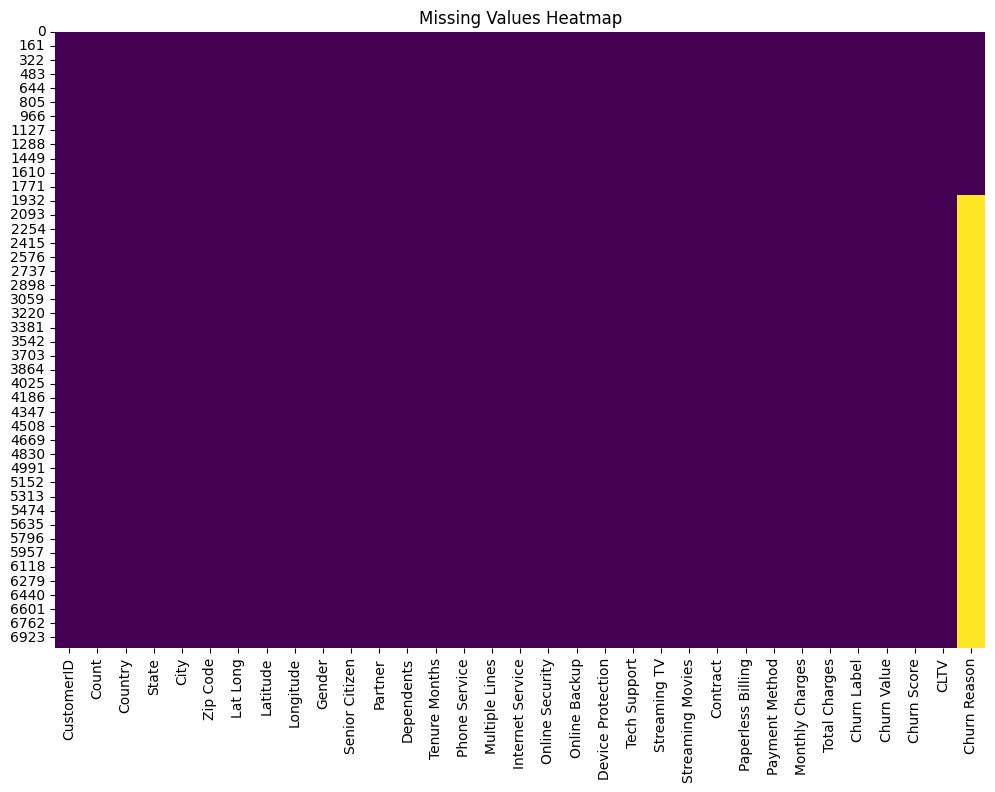

In [17]:
def heatmap_missingval(df, x, y, title):
    plt.figure(figsize=(x, y))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title(title)
    plt.show()
    
heatmap_missingval(df, 12, 8, "Missing Values Heatmap")

Get the numerical and categorical features.

In [18]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

print(categorical_features)
print(numerical_features)

['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']
['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']


Check the distributions.